<h1 align="center">🎓Student_Performance_Visualization🎓</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
data=pd.read_csv('StudentPerformance.csv')

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<h1 align="center">NULL Values</h1>

In [4]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## target variable -> performance Index
## Aim -> what will be the perforance index of a new student 

In [6]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [7]:
data['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
data.duplicated().sum()

np.int64(127)

In [9]:
data.shape

(10000, 6)

<h1 align="center">Mapping Values</h1>

In [10]:
EA_map={
    'Yes':1,
    'No':0
}
data['Extracurricular Activities']=data['Extracurricular Activities'].map(EA_map)

In [11]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<Axes: xlabel='Sleep Hours', ylabel='Count'>

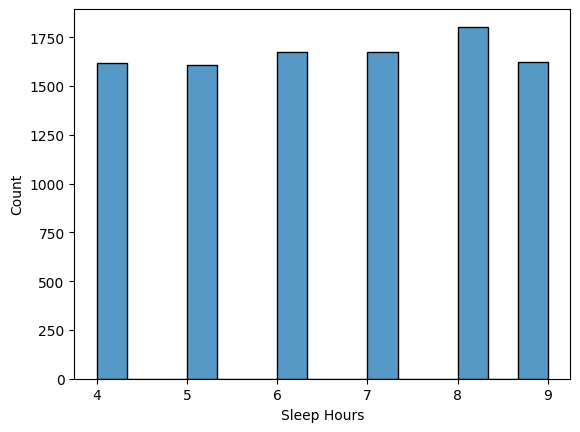

In [12]:
sns.histplot(data['Sleep Hours'],bins=15)

In [13]:
print(data.loc[data['Sleep Hours']==8].count()['Sleep Hours'])

1804


In [14]:
print(data.loc[data['Sleep Hours']==5].count()['Sleep Hours'])

1606


<h1 align="center">Observation</h1>

### 1) maximum number of students(1804) are taking atleast 8 hours of sleep
### 2) least number of students(1606) are taking 5 hours of sleep

<Axes: xlabel='Extracurricular Activities', ylabel='count'>

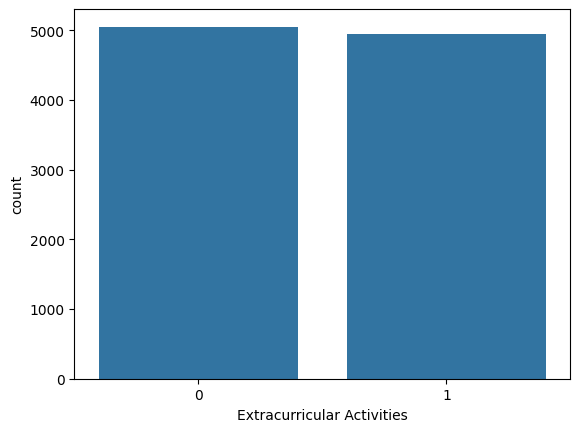

In [15]:
sns.countplot(x=data['Extracurricular Activities'])

In [16]:
data.value_counts('Extracurricular Activities',normalize=True,sort=True)

Extracurricular Activities
0    0.5052
1    0.4948
Name: proportion, dtype: float64

<h1 align="center">Observation</h1>

### 1) 50.52% students have no Extracurricular Activities
### 2) 49.48% students do have Extracurricular Activities

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

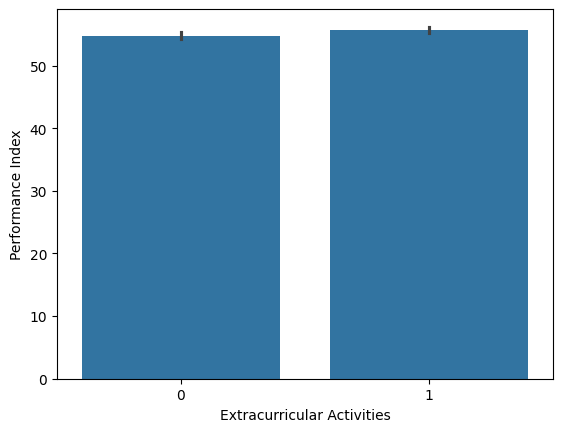

In [17]:
sns.barplot(x=data['Extracurricular Activities'],y=data['Performance Index'],data=data)

In [18]:
print(data.loc[data['Extracurricular Activities']==1].mean()['Performance Index'])

55.700889248181085


In [19]:
print(data.loc[data['Extracurricular Activities']==0].mean()['Performance Index'])

54.75851148060174


In [20]:
print(data.loc[data['Extracurricular Activities']==1].median()['Performance Index'])

55.0


In [21]:
print(data.loc[data['Extracurricular Activities']==1].median()['Performance Index'])

55.0


<h1 align="center">Observation</h1>

### 1) Extracurricular Activities doesn't have a major impact on Performance Index

In [22]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

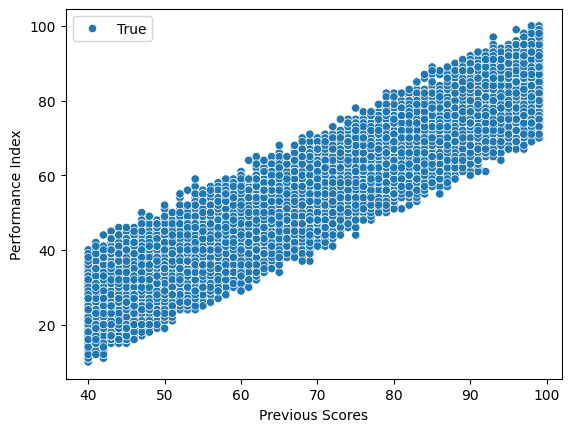

In [23]:
sns.scatterplot(x=data['Previous Scores'],y=data['Performance Index'],data=data,hue=True)

<h1 align="center">Observation</h1>

### 1) The Previous Scores are heavily correlated to the Performance Index

<Axes: >

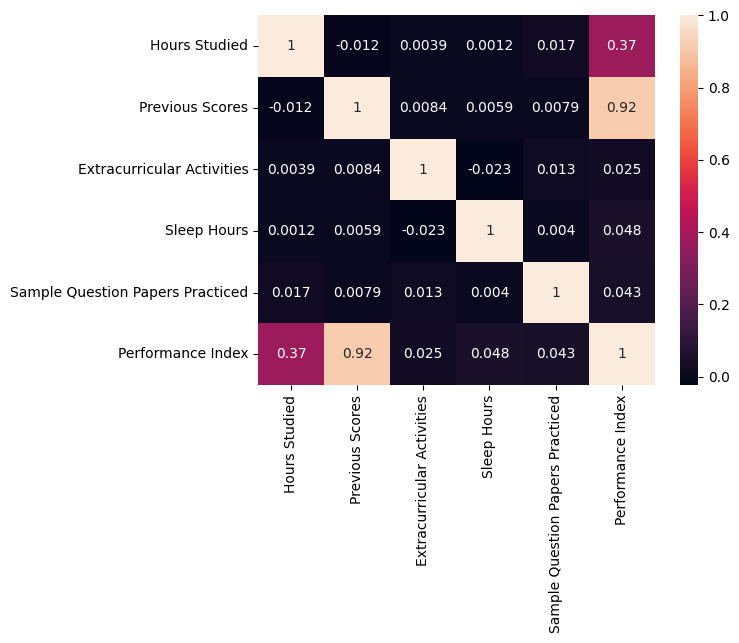

In [24]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

## Observation -> major features affecting Perfomance Index are Hours Studied and Previous scores

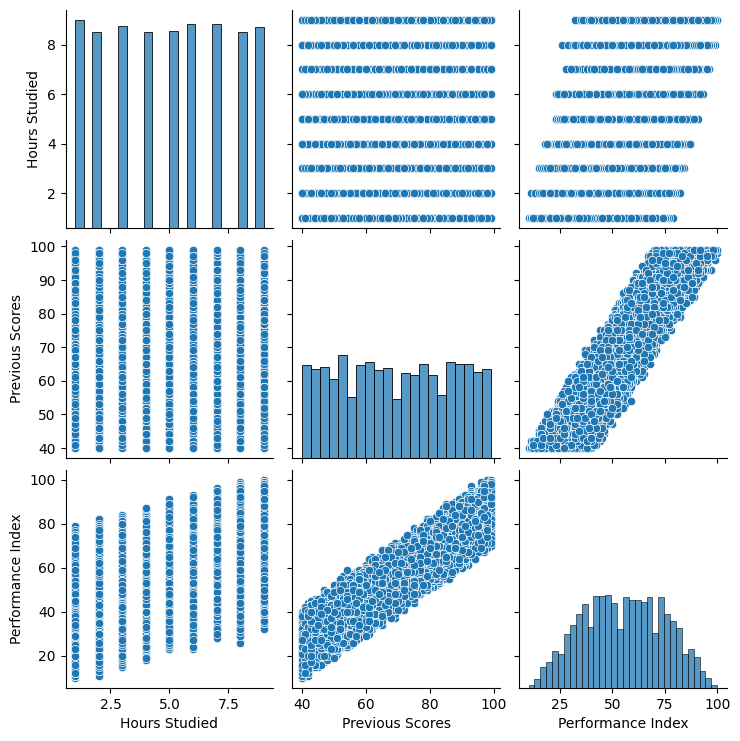

In [25]:
sns.pairplot(data[['Hours Studied', 'Previous Scores','Performance Index']])

<h1 align="center">Observation</h1>

### 1) Major features affecting Perfomance Index are Hours Studied and Previous scores